<a href="https://colab.research.google.com/github/RaminTK/Job-Shop/blob/main/SA_JobShop_FT06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

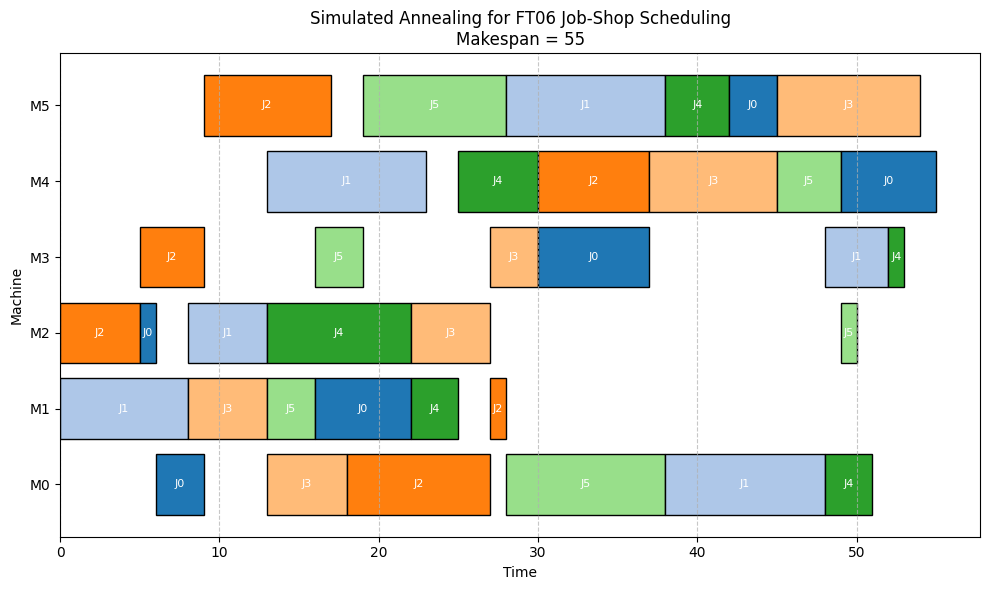

(55, [2, 2, 1, 0, 3, 0, 5, 0, 3, 2, 1, 1, 4, 5, 2, 4, 5, 1, 2, 5])

In [5]:
import math
import random
import matplotlib.pyplot as plt

# FT06 dataset
# OPTIMAL SOL = 55
jobs_data = [
    [(2,1),(0,3),(1,6),(3,7),(5,3),(4,6)],
    [(1,8),(2,5),(4,10),(5,10),(0,10),(3,4)],
    [(2,5),(3,4),(5,8),(0,9),(1,1),(4,7)],
    [(1,5),(0,5),(2,5),(3,3),(4,8),(5,9)],
    [(2,9),(1,3),(4,5),(5,4),(0,3),(3,1)],
    [(1,3),(3,3),(5,9),(0,10),(4,4),(2,1)],
]


n_jobs = len(jobs_data)
n_machines = 6

def simulate_schedule(order, jobs_data):
    machine_times = [0] * n_machines
    job_times = [0] * n_jobs
    op_indices = [0] * n_jobs
    schedule = []

    for job in order:
        op_idx = op_indices[job]
        if op_idx >= len(jobs_data[job]):
            continue
        machine, duration = jobs_data[job][op_idx]
        start = max(machine_times[machine], job_times[job])
        finish = start + duration
        schedule.append((job, machine, start, finish))
        machine_times[machine] = finish
        job_times[job] = finish
        op_indices[job] += 1

    return max(job_times), schedule

# Cost function
def cost(solution):
    makespan, _ = simulate_schedule(solution, jobs_data)
    return makespan

# initial solution
initial_solution = [j for j in range(n_jobs) for _ in range(len(jobs_data[j]))]

# Setting for Simulated Annealing
T = 100.0
T_min = 0.01
alpha = 0.98
current_solution = initial_solution.copy()
best_solution = current_solution.copy()
current_cost = cost(current_solution)
best_cost = current_cost

while T > T_min:
    for _ in range(100):
        # Swap two random positions
        i, j = random.sample(range(len(current_solution)), 2)
        neighbor = current_solution.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        neighbor_cost = cost(neighbor)

        if neighbor_cost < current_cost or random.random() < math.exp((current_cost - neighbor_cost) / T):
            current_solution = neighbor
            current_cost = neighbor_cost
            if current_cost < best_cost:
                best_solution = current_solution.copy()
                best_cost = current_cost
    T *= alpha


best_makespan, best_schedule = simulate_schedule(best_solution, jobs_data)


# =============== Plottttttting here ====================
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.tab20.colors

for job_id, machine, start, finish in best_schedule:
    ax.barh(machine, finish - start, left=start, color=colors[job_id % len(colors)], edgecolor='black')
    ax.text(start + (finish - start)/2, machine, f"J{job_id}", va='center', ha='center', color='white', fontsize=8)

ax.set_yticks(range(n_machines))
ax.set_yticklabels([f"M{m}" for m in range(n_machines)])
ax.set_xlabel("Time")
ax.set_ylabel("Machine")
ax.set_title(f"Simulated Annealing for FT06 Job-Shop Scheduling\nMakespan = {best_makespan}")
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

best_makespan, best_solution[:20]
